In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
!pip install seaborn


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.style.use("seaborn-whitegrid")


In [5]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

### head()를 사용하여 어떤 데이터가 있는지 확인해봅니다.

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측값을 확인해줍니다. isnull.sum()을 확인하면 null의 개수를 확인가능합니다.
### 나이와 방호수가 많이 누락되어 있네요.

In [7]:
data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### '살아남은 것'에 대하여 초점을 맞춰 분석해보겠습니다.
### 'Survived'칼럼을 가지고 놀겠습니다.
### pandas에서 plot.pie를 이용하여 파이차트를 이용하고 
### seaborn의 countplot도 이용하겠습니다.
### 색맹환자를 위해 VIRIDIS를 이용했습니다.
### 돌아가신 사람이 더 많은 것을 확인할 수 있습니다.

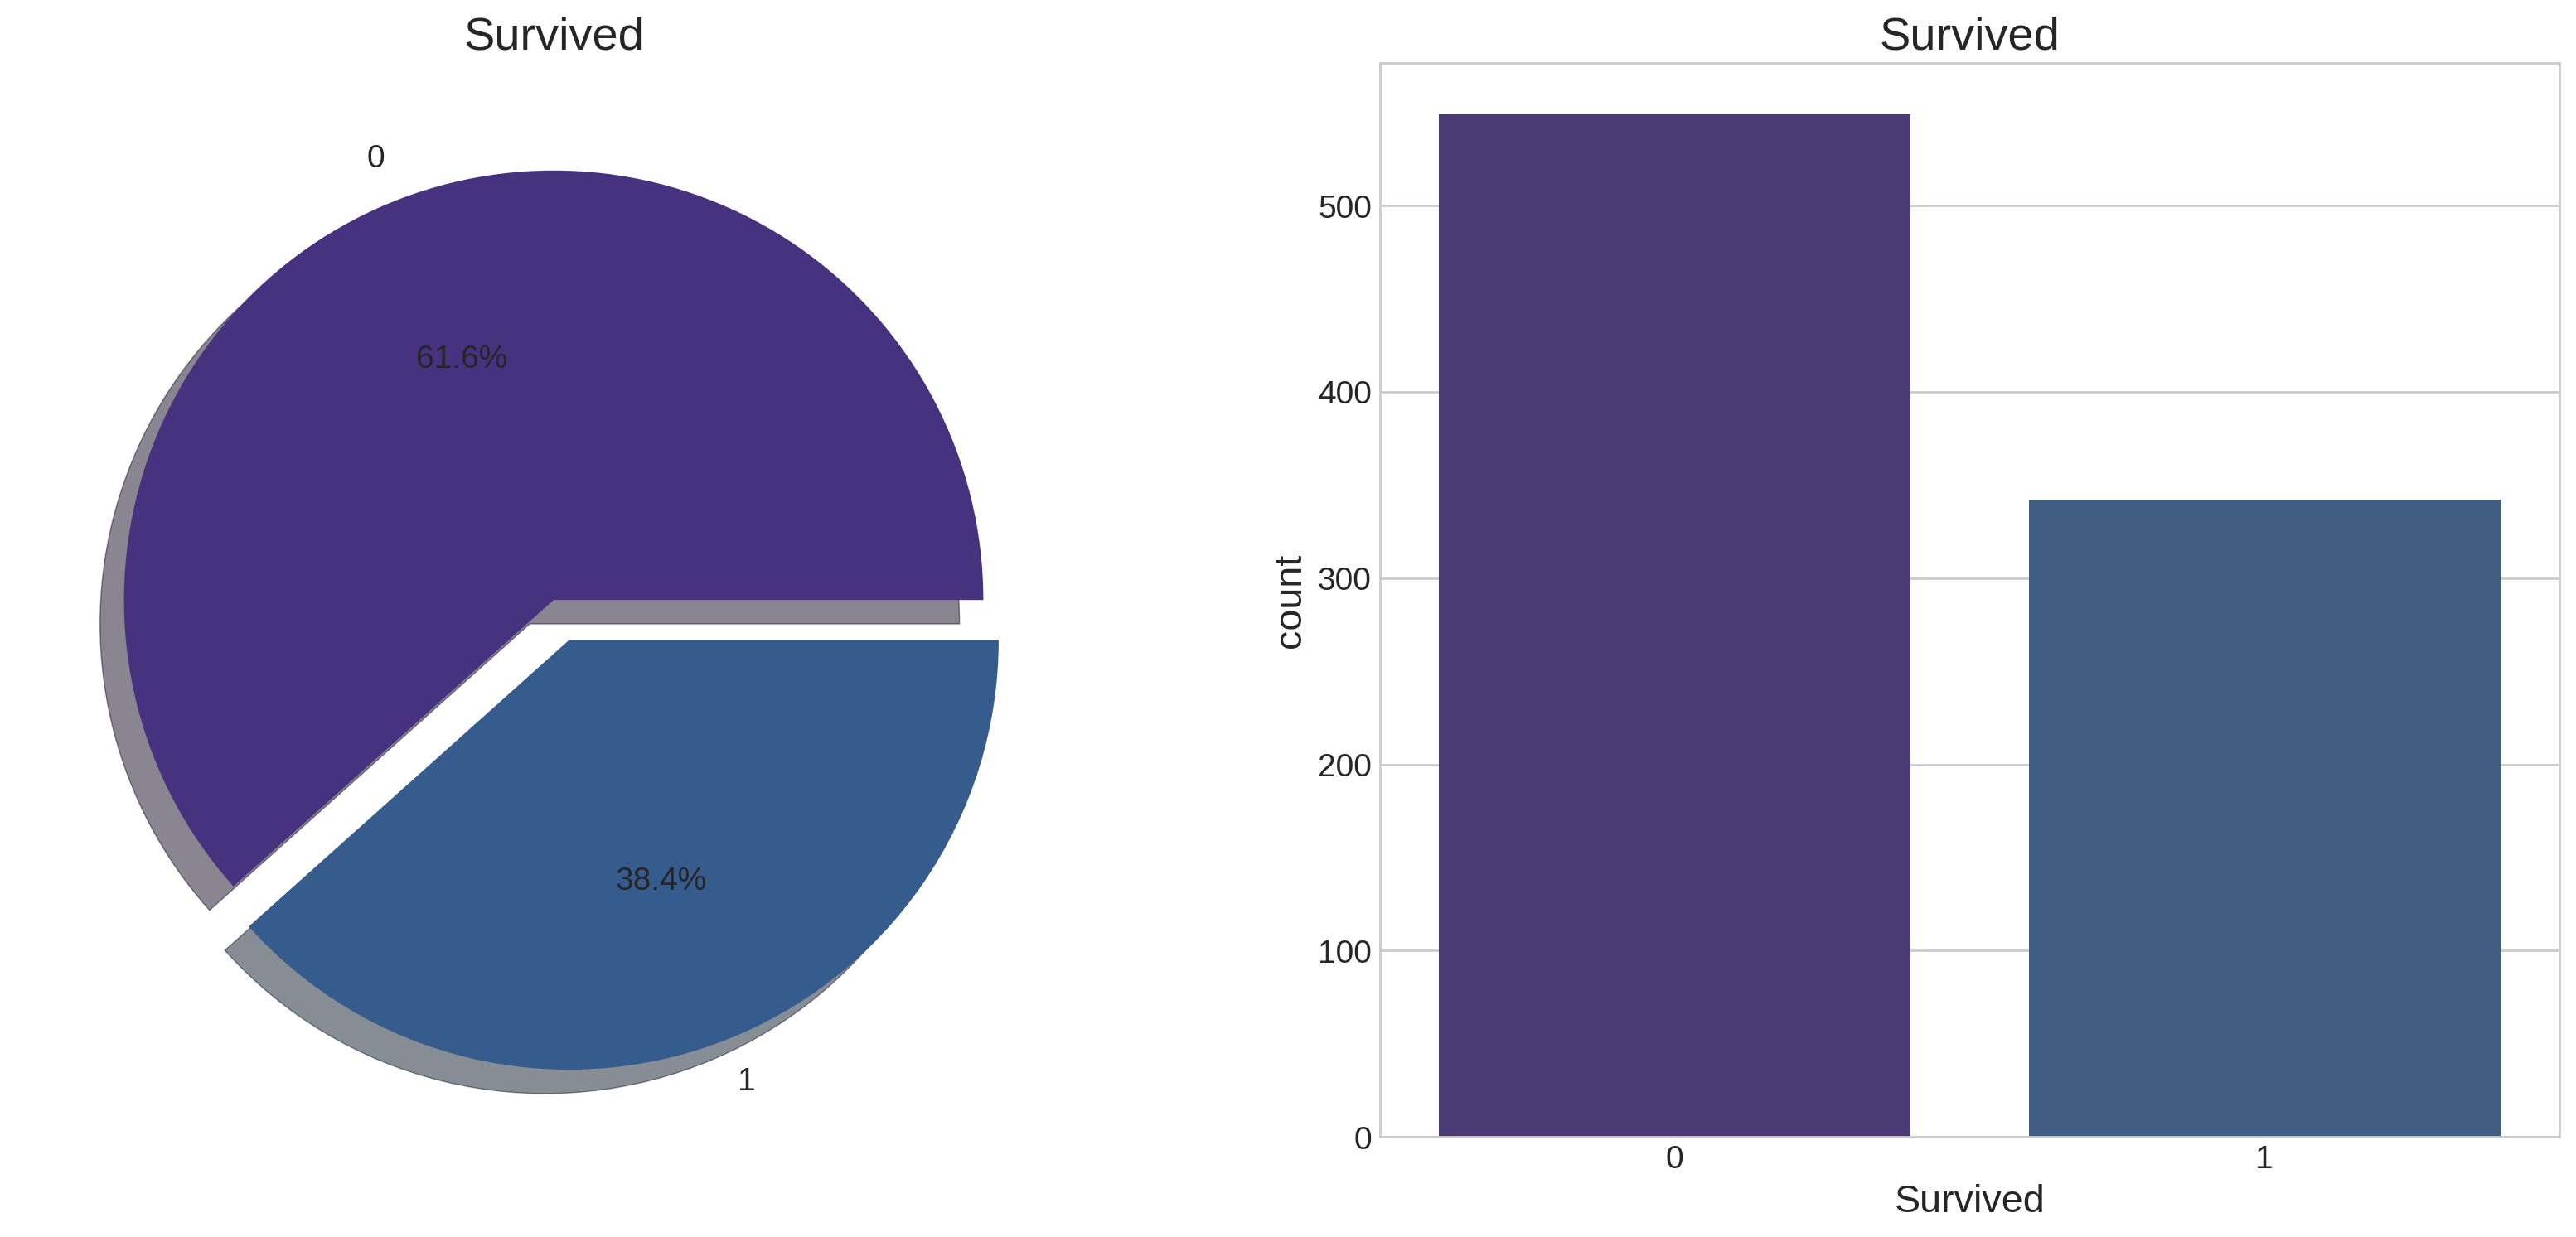

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.set_palette("viridis")

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()


### 성별로 생존 여부를 확인해보겠습니다.
### 여성이 확실히 더 많이 살아남았습니다.
### 성별로 여성이 70% 이상 더 생존한 것을 알 수 있고, 성별로 남성은 100명 정도 생존, 400명 이상 사망, 여성은 200명 이상 생존, 100명 이하 사망을 그래프로 볼 수 있다.

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

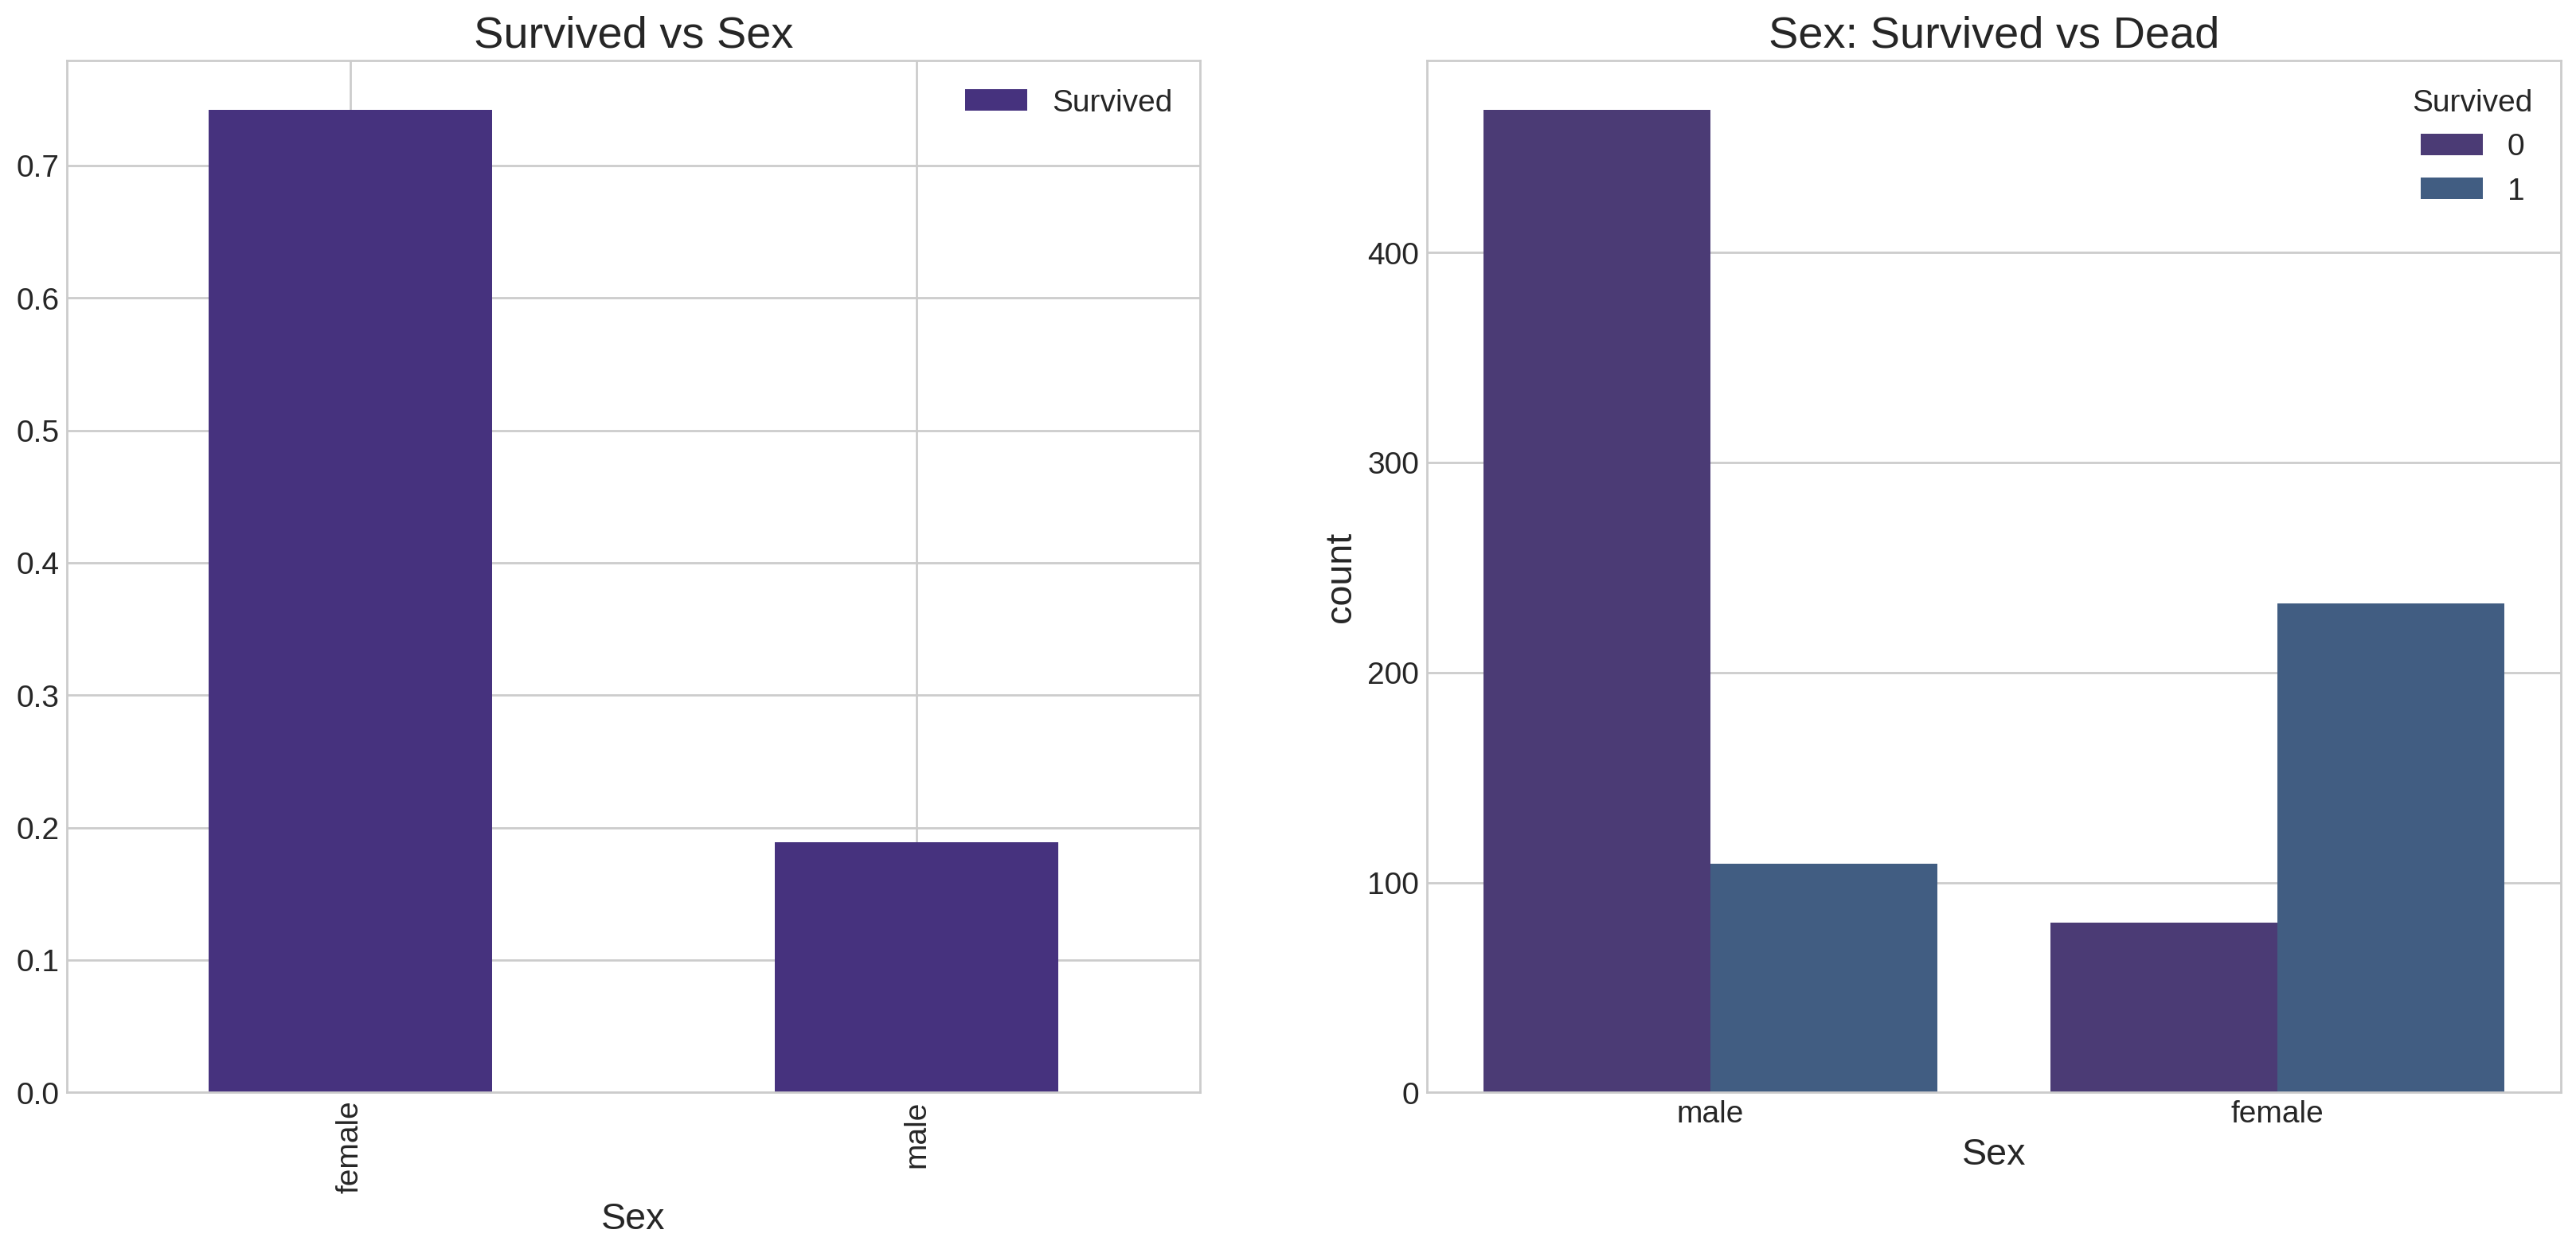

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.set_palette("viridis")

data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()



### Crosstab을 통해 객실 등급(Pclass)에 따른 생존자를 확인해본다.
### 전체 생존자는 1등급 객실이 제일 많았으며, 여성의 생존자가 많은 것을 확인할 수 있다. 슬프게도 3등급 객실의 남성이 제일 사망자가 많은 것을 확인 할 수 있다.

In [11]:
cross_tab = pd.crosstab(data['Pclass'], data['Survived'], margins=True)
cross_tab.style.background_gradient(cmap='viridis')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 객실별로 3등급 객실에 사람이 제일 많았으며 1등급 객실이 두번째, 2등급 객실이 제일 적었다. 객실별로 생존자는 1등급 객실이 제일 많았으며 3등급 객실이 사망자가 제일 많았다. 

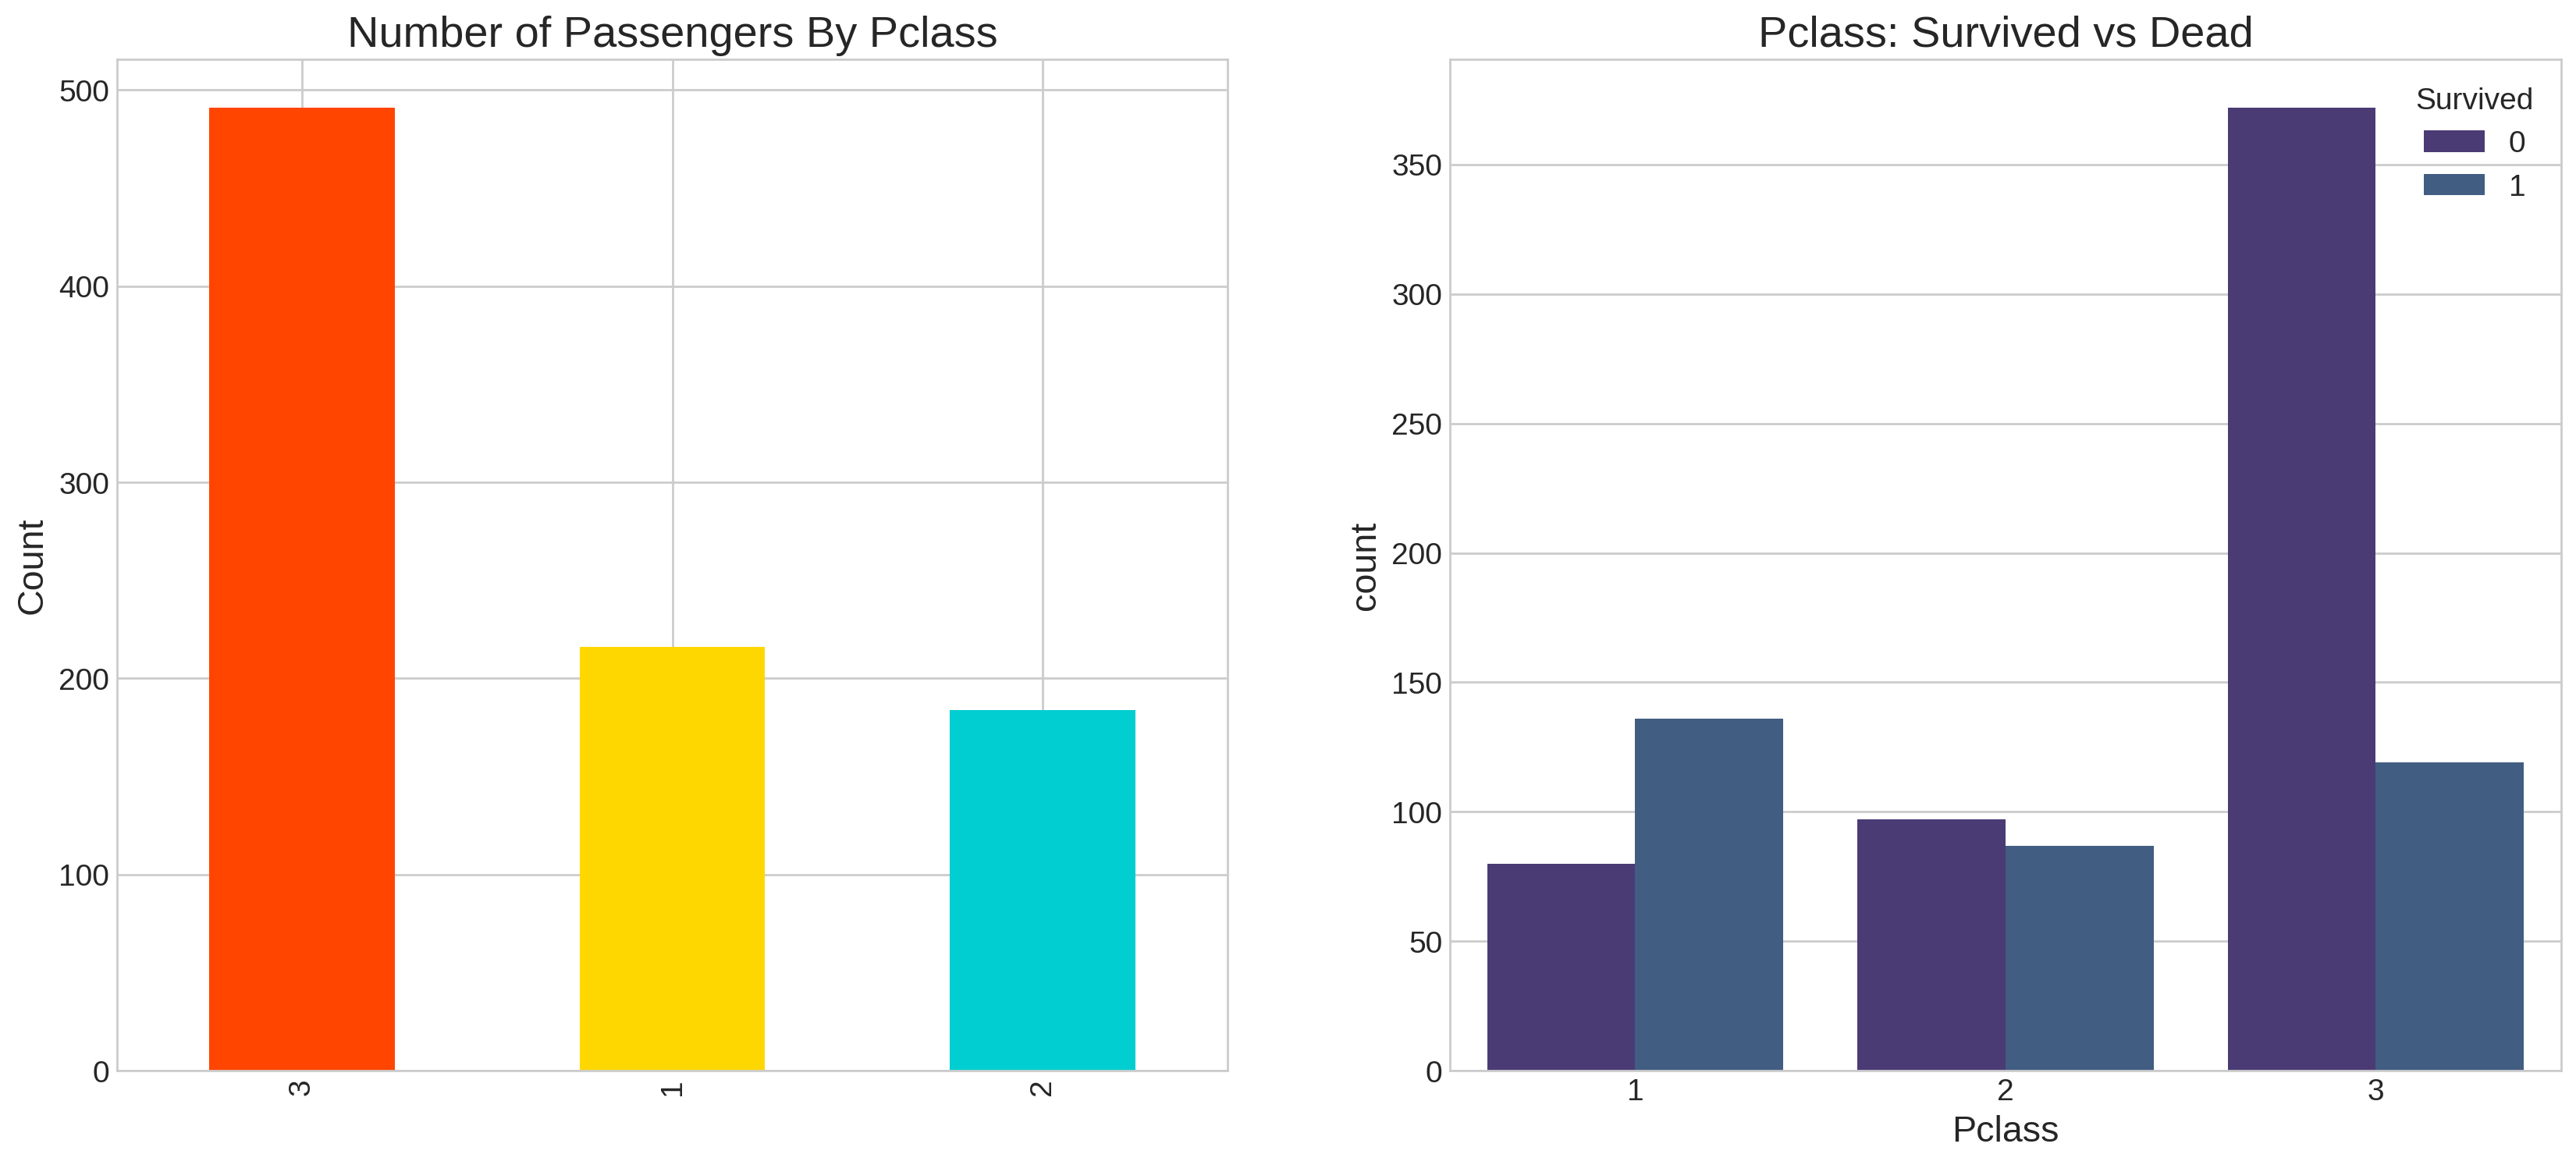

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#FF4500', '#FFD700', '#00CED1'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()


### 전체 생존자는 1등급 객실이 제일 많았으며, 여성의 생존자가 많은 것을 확인할 수 있다. 슬프게도 3등급 객실의 남성이 제일 사망자가 많은 것을 확인 할 수 있다.

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='winter_r')

### 1등급 객실에 승선한 것이 가장 생존율이 높은 것으로 보이며 특히 여성의 비율이 높다.
### pandas의 crosstab을 이용하여 성별(hue)와 살아남은 것을 묶고, y축으로 Pclass를 두어서 분석한다.
### 그렇게 하면 하나의 표에 3개의 지표를 볼 수 있다.

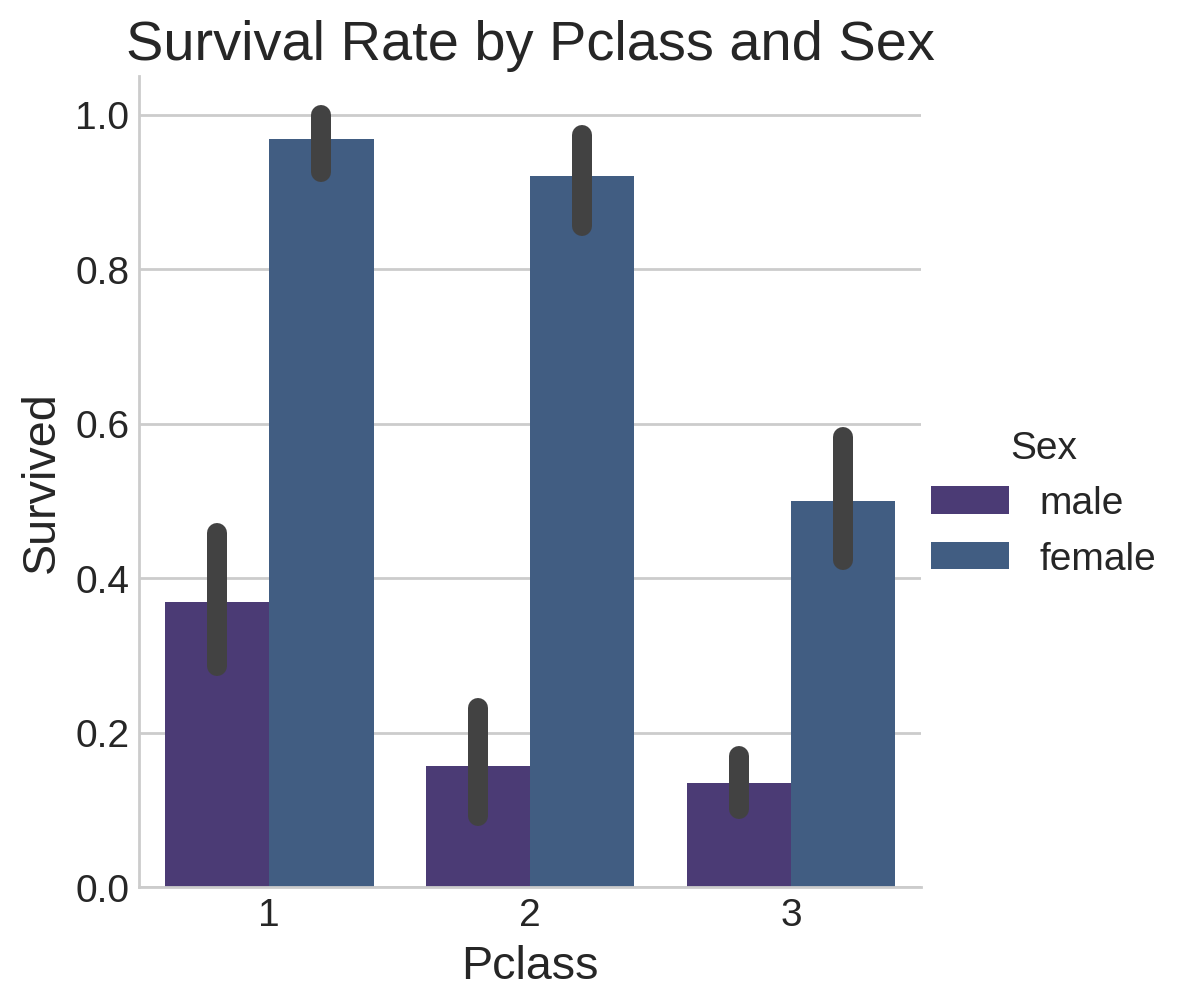

In [14]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar')
plt.title('Survival Rate by Pclass and Sex')
plt.show()

### 객실과 나이에 대한 생존자 비율, 성별과 나이에 대한 생존자 비율을 살펴본다.
### 연령은 연속적인 값이기 때문에 그래프에서 yticks를 사용해준다.
### Yticks 함수는 x축의 눈금 위치와 해당 눈금에 표시될 레이블을 지정하는 데 사용된다.
### 1등실에서 

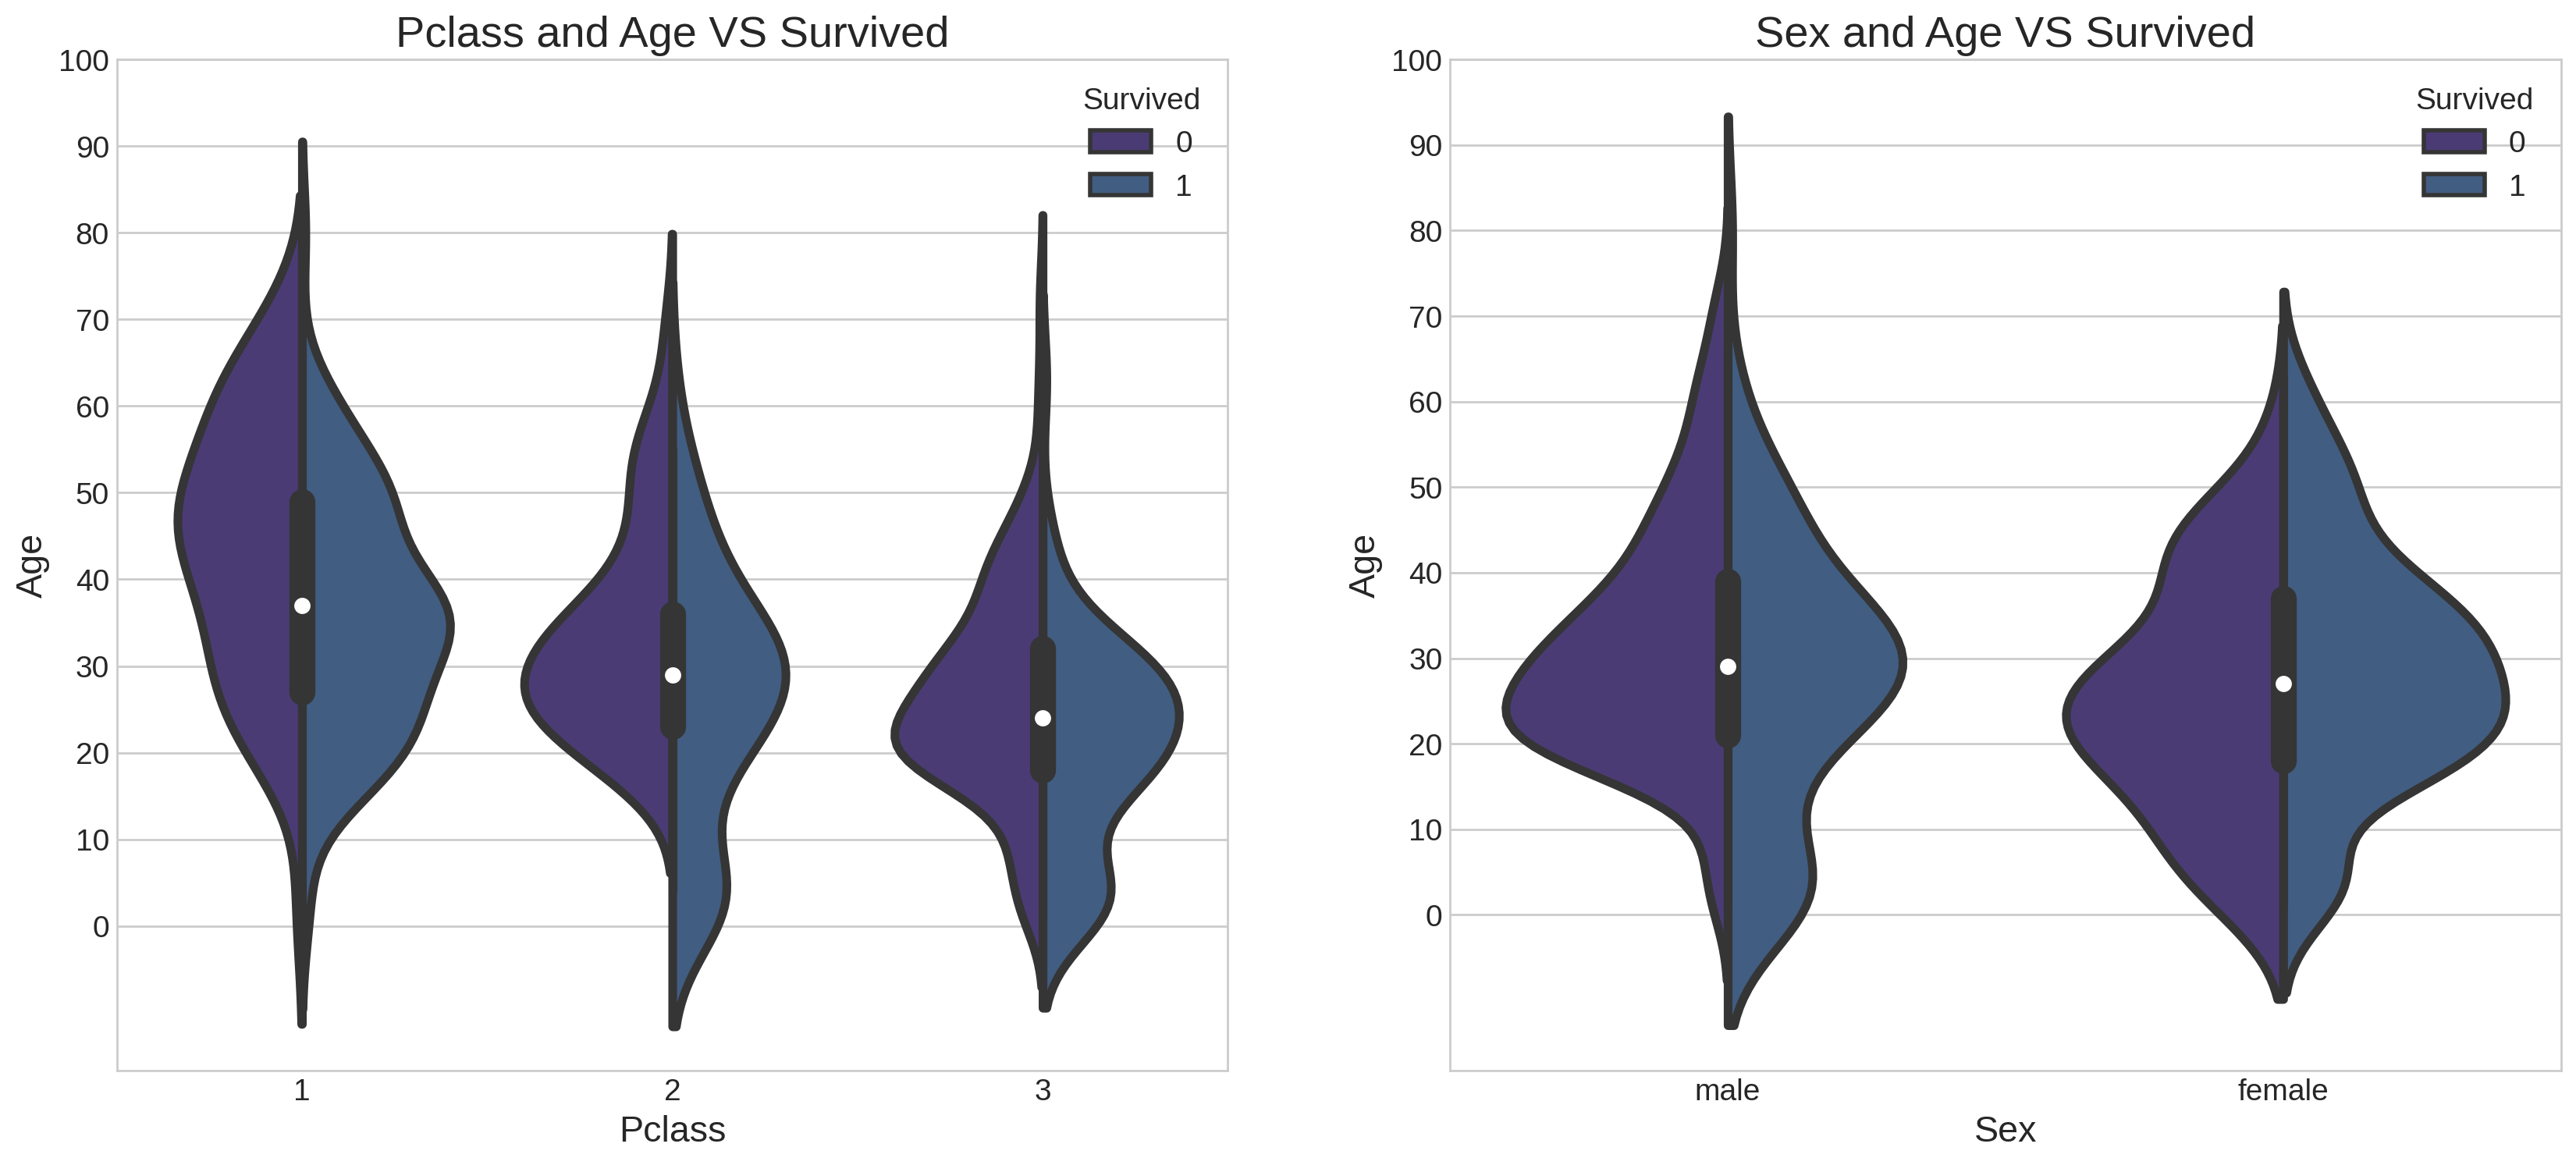

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()
